In [3]:
## This is a further analysis on the dataset for keystrok dynamics
# Date: 3 Aug 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv('DSL-StrongPasswordData.csv')
dataset.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


## Selection of First 20 Subjects
Only the first 20 sibjects of the benchmark data will be selected for this ML project.

In [4]:
# Get the first 20 subjects 
first_20subject = (dataset.groupby(by='subject', axis=0).count().index[:20])

selected_dataset = dataset[dataset['subject'].isin(first_20subject)]
selected_dataset

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,s025,8,46,0.1243,0.1865,0.0622,0.0795,0.1313,0.0518,0.0774,...,0.0985,0.6102,0.5117,0.0781,0.1792,0.1011,0.0985,0.5850,0.4865,0.0847
7996,s025,8,47,0.0934,0.1556,0.0622,0.0710,0.1233,0.0523,0.0676,...,0.0827,0.0803,-0.0024,0.0877,0.1735,0.0858,0.0966,0.4622,0.3656,0.1093
7997,s025,8,48,0.1338,0.2675,0.1337,0.0737,0.1315,0.0578,0.0739,...,0.0541,0.1091,0.0550,0.0692,0.1653,0.0961,0.0927,0.6412,0.5485,0.1373
7998,s025,8,49,0.1212,0.1618,0.0406,0.0665,0.1283,0.0618,0.0876,...,0.1138,0.3477,0.2339,0.0834,0.2721,0.1887,0.0948,0.5077,0.4129,0.0979


## Analysis on the Feature Correlations
There are a total of 31 features on the keystroke dynamics on the 10 characters, up to the return key hold time. Some of these dynamic timings might be correlated.  This is an analysis on their possible correlation.

In [5]:
# Pick out the feature columns
feature_col = selected_dataset.columns[3:33]
features = selected_dataset[feature_col]

# Calculation correlation of all 
# print(features.corr())

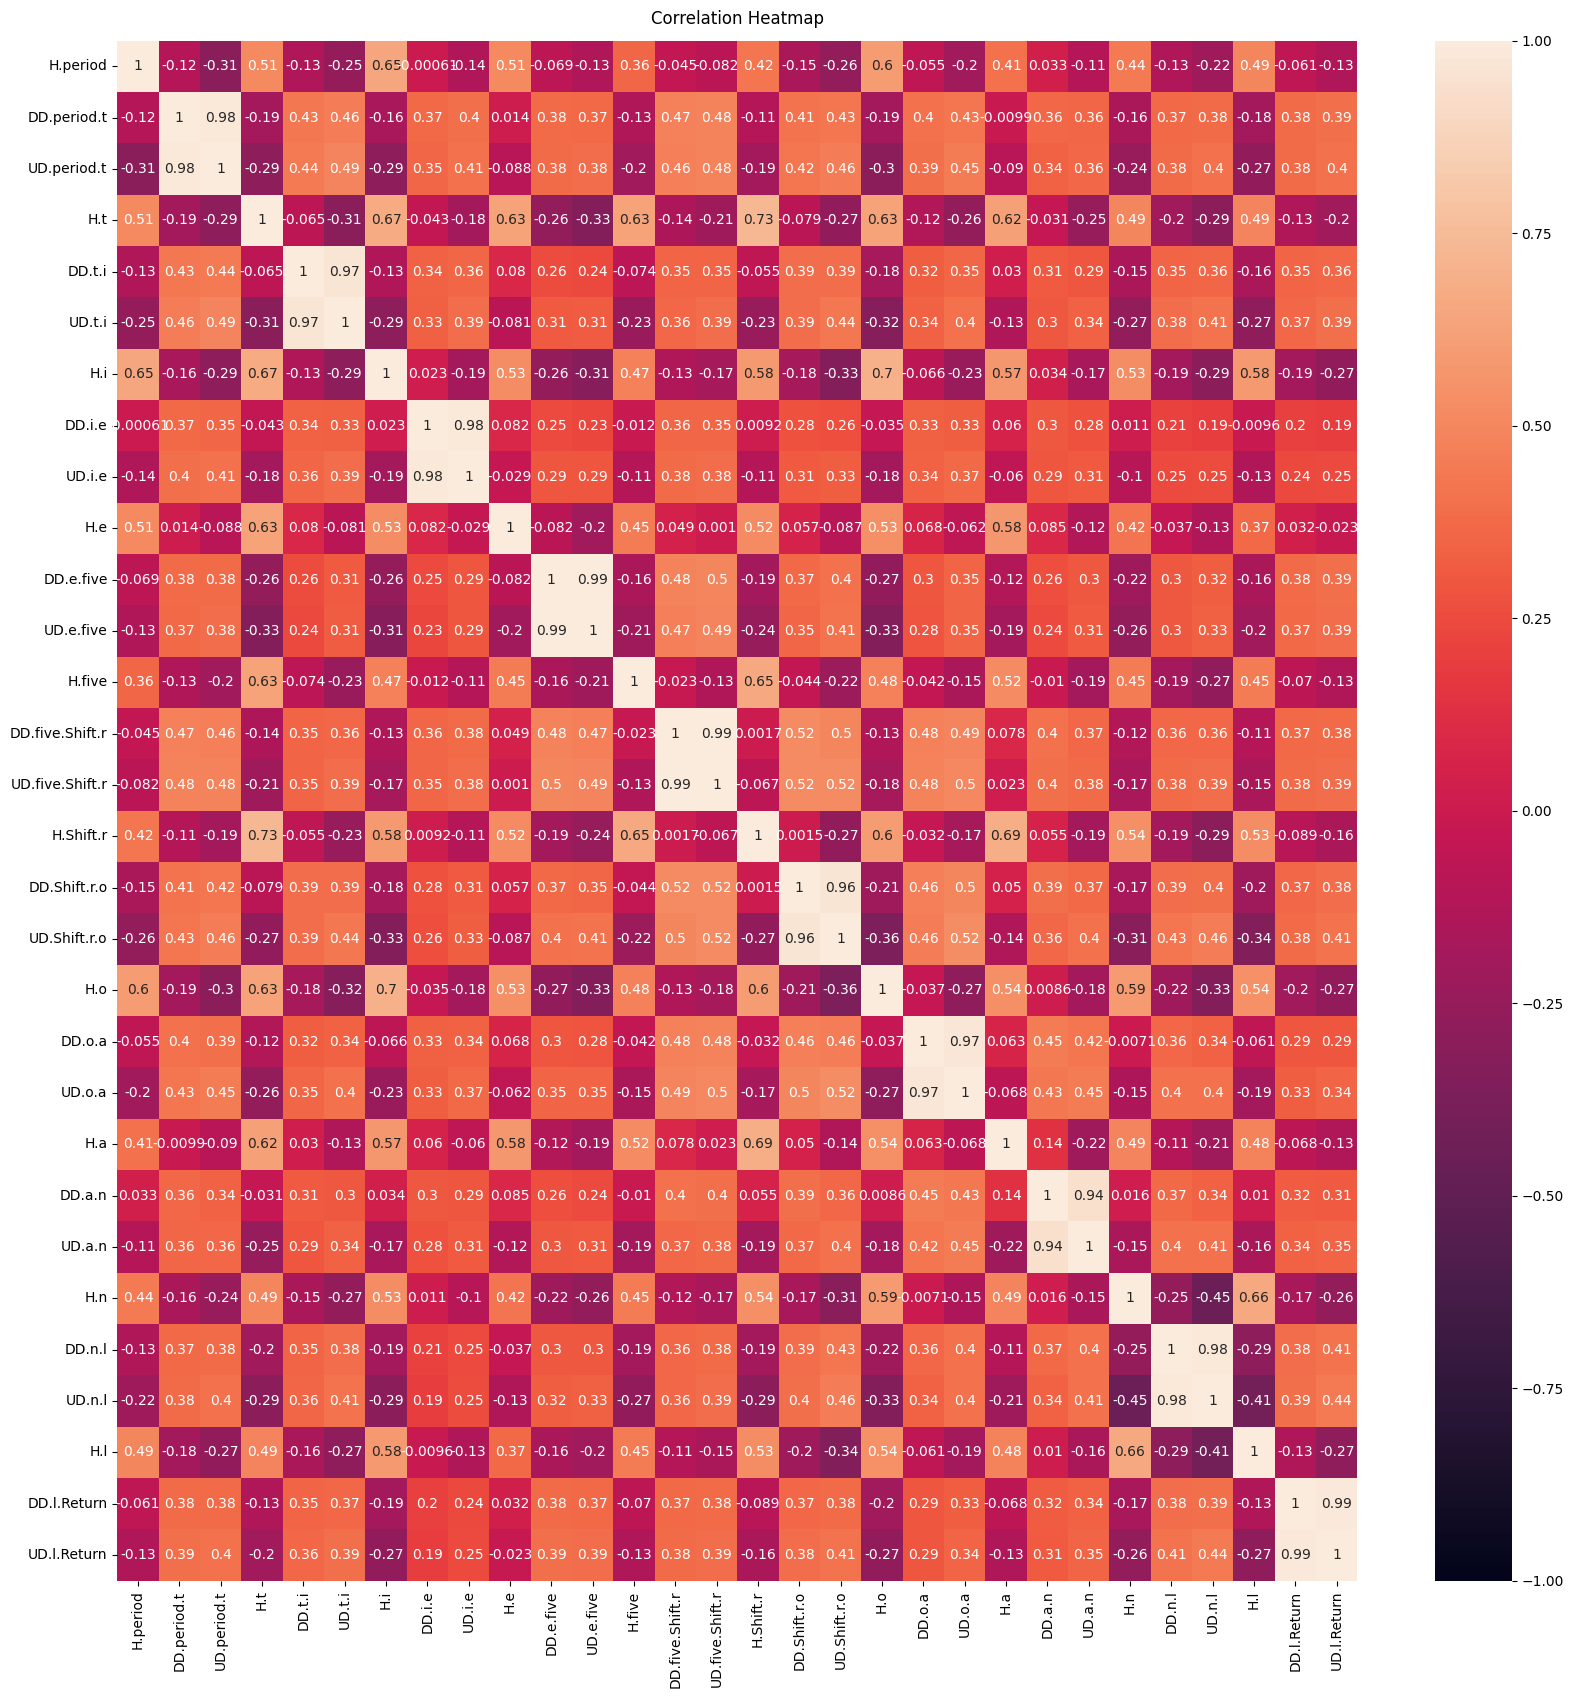

In [6]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [8]:
# Get the high correlation pairs
corr_val = features.corr().abs()
s = corr_val.unstack()
# sso = s.sort_values(kind="quicksort", ascending=False)

print("Highly correlated pairs:")
count = 0
for key, value in s.items():
    if value > 0.9 and key[0] != key[1]:
        count += 1
        print(count, ":", key[0], "&", key[1], ", R:", value)



Highly correlated pairs:
1 : DD.period.t & UD.period.t , R: 0.9804370622134938
2 : UD.period.t & DD.period.t , R: 0.9804370622134938
3 : DD.t.i & UD.t.i , R: 0.9683213974404641
4 : UD.t.i & DD.t.i , R: 0.9683213974404641
5 : DD.i.e & UD.i.e , R: 0.9781503124192313
6 : UD.i.e & DD.i.e , R: 0.9781503124192313
7 : DD.e.five & UD.e.five , R: 0.9927592737434405
8 : UD.e.five & DD.e.five , R: 0.9927592737434405
9 : DD.five.Shift.r & UD.five.Shift.r , R: 0.9945039636609478
10 : UD.five.Shift.r & DD.five.Shift.r , R: 0.9945039636609478
11 : DD.Shift.r.o & UD.Shift.r.o , R: 0.9625912149041693
12 : UD.Shift.r.o & DD.Shift.r.o , R: 0.9625912149041693
13 : DD.o.a & UD.o.a , R: 0.9710491971303019
14 : UD.o.a & DD.o.a , R: 0.9710491971303019
15 : DD.a.n & UD.a.n , R: 0.937629703787072
16 : UD.a.n & DD.a.n , R: 0.937629703787072
17 : DD.n.l & UD.n.l , R: 0.9773842864340798
18 : UD.n.l & DD.n.l , R: 0.9773842864340798
19 : DD.l.Return & UD.l.Return , R: 0.9898801363757596
20 : UD.l.Return & DD.l.Retur

<b>Conclusions</b>: From the correlation analysis above, we can observe that the DD-series data is highly correlated (r > 0.9) to each of the UD-series of the same keystroke.  This is expected as the UD-timing of each transition keystroke is a component of the DD-timing of the same keystroke.
Therefore, to simplify the model and achieve better efficiency, we will drop all the DD_series timing data from the feature selection.  This will cut the number of features for this ML models from <b>31</b> to <b>21</b>.